## This project uses a .json file containing 2018 earthquake data to visualize earthquakes using interactive geospatial map

In [18]:
import json

from plotly.graph_objs import Scattergeo, Layout
from plotly import offline

filename = 'data/eq_data_30_day_m1.json'
with open(filename) as f:
    all_earth_quake_data = json.load(f)
readable_file = 'data/my_readable_eq_data.json'
with open(readable_file, 'w') as f:
    json.dump(all_earth_quake_data, f, indent = 4)
all_eq_dicts = all_earth_quake_data['features']
print(len(all_eq_dicts))

# lets save the magnitude data of each earthquake in a list
mags = []
lons = [] 
lats = []
hover_texts = []
for eq_dicts in all_eq_dicts:
    mag = eq_dicts['properties']['mag']
    mags.append(mag)
    lon = eq_dicts['geometry']['coordinates'][0]
    lons.append(lon)
    lat = eq_dicts['geometry']['coordinates'][1]
    lats.append(lat)
    hover_text = eq_dicts['properties']['title']
    hover_texts.append(hover_text)

# Visualization within a world map
#data = [Scattergeo(lon = lons. lat = lats)]
data = [{
	'type' : 'scattergeo',
	'lon' : lons,
    'text' : hover_texts,
	'lat' : lats,
	'marker' : {
		'size' : [5*mag for mag in mags],
		'color' : mags,
		'colorscale' : 'Viridis',
		'reversescale' : True,
		'colorbar' : {'title' : 'Magnitude'}
	}
}]
my_layout = Layout(title = 'Global incidence of earthquakes in 2018')
fig = {'data': data, 'layout' : my_layout}
offline.plot(fig, filename = 'global_earthquakes.html')

6274


'global_earthquakes.html'

### This is what our visualization looks like (see the file 'global_earthquakes.html' for details)



![][image_ref_0yrfcekg]

[image_ref_0yrfcekg]: 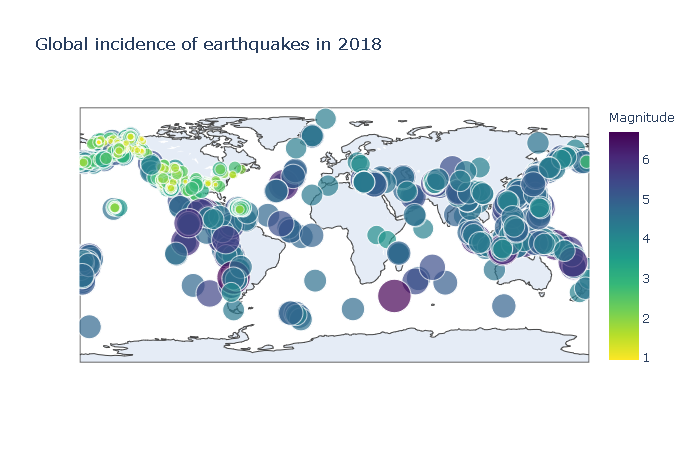
